Dave Kramer(1160802) en Frank Kramer(1160466), Analytical Computing

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Wij maken gebruik van de volgende libraries:

Pandas voor het werken met gegevens in tabelvorm,
Numpy zal nodig zijn om de gegevens in de correlatiematrix af te ronden,
Matplotlib en Seaborn voor het visualiseren van data in diagrammen en
SKLearn voor de machine learning

Deze dataset bevat het volgende:

age: is de leeftijd van de persoon

sex: is het gender van de persoon

exang: door inspanning veroorzaakte anging (1 = ja; 0 = nee)

ca: is aantal grote bloedvaten (0-3)

cp: het type borstpijn, 1: typical angina, 2: atypical angina, 3: non-anginal pain en 4: asymptomatic

trtbps: bloeddruk in rust (in mm Hg)

chol : cholesterol in mg/dl verkregen via een BMI sensor

fbs : (bloedsuikerspiegel > 120 mg/dl) (1 = waar; 0 = niet waar)

rest_ecg : elektrocardiografische resultaten in rust, 0: normaal, 1: het hebben van een ST-T-golfafwijking (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: met waarschijnlijke of definitieve linkerventrikelhypertrofie volgens de criteria van Estes

thalach : maximale bereikte hartslag

target : kans op hartaanval, 0: minder kans, 1: meer kans op hartaanval

In [96]:
data = pd.read_csv('heart.csv')
df = data
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Hier droppen we de not a number values als die aanwezig zijn in de dataframe, dit is handig als wij in de toekomst een soortgelijke dataframe willen toepassen aan onze notebook en deze NaN values bevat.

In [97]:
df.dropna
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


De dataset bevat 303 rijen en 14 kolommen dat kunnen wij zien door de dataset te "shapen".

In [98]:
df.shape

(303, 14)

De dataframe bevat de volgende kolommen: age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall en output.

In [99]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Om te kijken of de kolommen de juiste data type zijn gebruiken wij het volgende:

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Hierboven komen wij erachter dat er 13 data types van int64 zijn en 1 van float64 als wij de csv bekijken dan komt dit overeen met de dataframe omdat de kolom oldpeak kommagetallen bevat.

Hieronder kunnen wij per rij zien wat het gemiddelde (mean), standaarddeviatie (std), minimum (min) en maximale (max) waarden zijn.

Hier kunnen wij uit halen dat de gemiddelde leeftijd van de personen ongeveer 54 jaar is de jongste persoon is 29 en de oudste is 77.

In [101]:
print("De minimale leeftijd is: ", df["age"].min())
print("De gemiddelde leeftijd is: ", df["age"].mean())
print("De maximale leeftijd is: ", df["age"].max())
df.describe()

De minimale leeftijd is:  29
De gemiddelde leeftijd is:  54.366336633663366
De maximale leeftijd is:  77


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Wij plotten het kolom output om een beeld te geven op de waarden.

0 is hierbij een kleinere kans op hartaanval die bestaat uit 138 mensen.

1 is hierbij een grotere kans op hartaanval die bestaat uit 165 mensen.

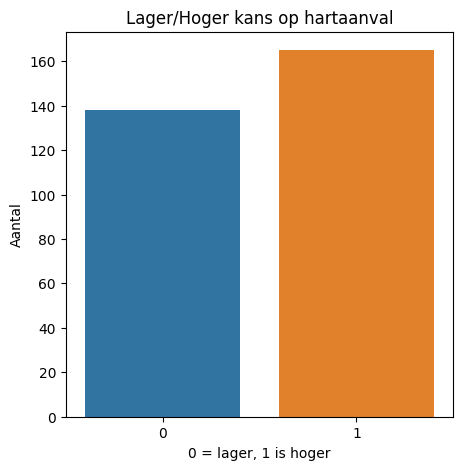

1    165
0    138
Name: output, dtype: int64

In [125]:
plt.figure(figsize=(5, 5))
plt.title("Lager/Hoger kans op hartaanval")
plt.style.use('fast')
sns.countplot(x="output", data=df)
plt.xlabel("0 = lager, 1 is hoger")
plt.ylabel("Aantal")
plt.show()
pd.value_counts(df['output'])

Volgens onze plot "Leeftijd naar aantal" neemt de kans op hartaanval rond de 40ste toe, met een paar uitschieters op 54, 57 en 58 - en neemt deze weer goed af op 67 jarige leeftijd.

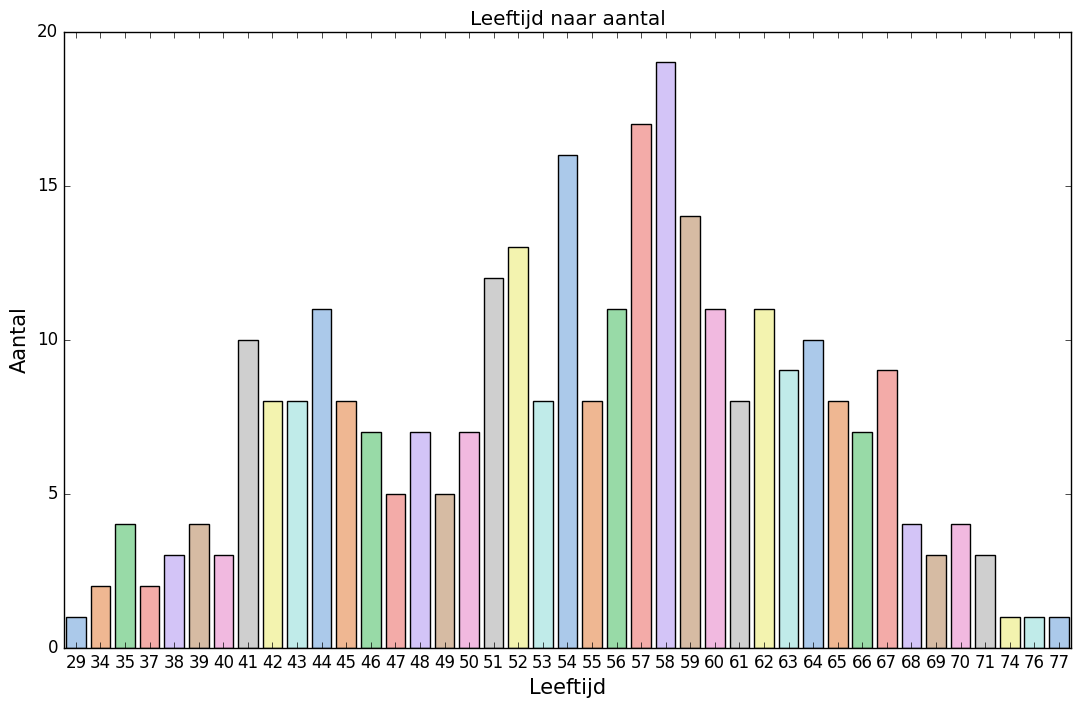

In [103]:
plt.figure(figsize=(13,8))
plt.style.use('classic')
sns.countplot(x=df["age"], palette="pastel")
plt.xlabel("Leeftijd", fontsize=15)
plt.ylabel("Aantal", fontsize=15)
plt.title("Leeftijd naar aantal")
plt.show()

Met de volgende plot laten wij zien hoeveel mannen (207) en hoeveel vrouwen (96) er zijn.

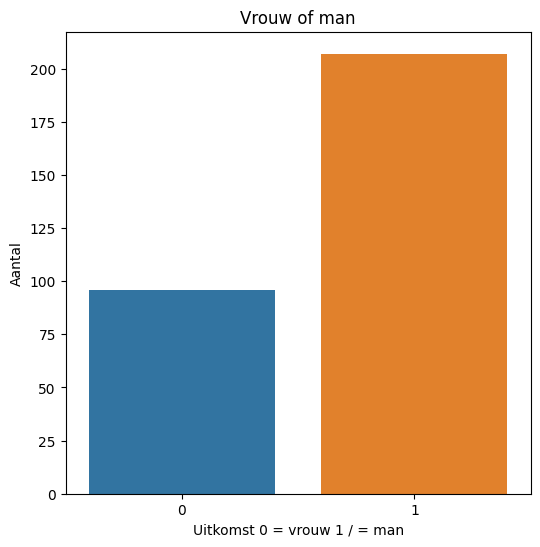

1    207
0     96
Name: sex, dtype: int64

In [126]:
plt.figure(figsize=(6, 6))
plt.title("Vrouw of man")
plt.style.use('default')
sns.countplot(x="sex", data=df)
plt.xlabel("Uitkomst 0 = vrouw 1 / = man")
plt.ylabel("Aantal")
plt.show()
pd.value_counts(df["sex"])

Volgens onze grafiek en dataset hebben vrouwen een 75% kans op hartaanvallen en mannen hebben ~45% kans op hartaanvallen.

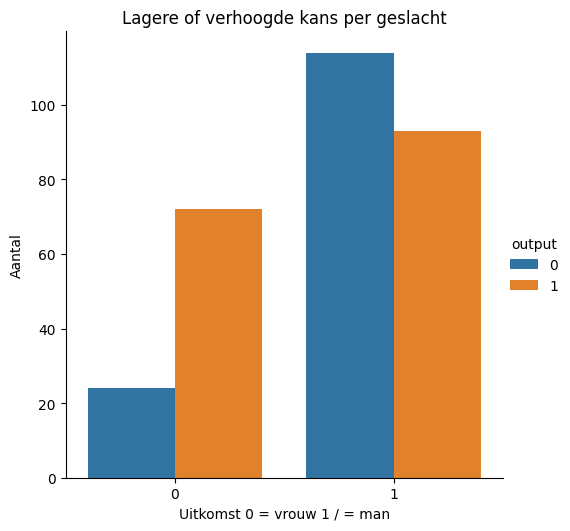

,output
sex,
1,0.449275
0,0.750000


In [127]:
sns.catplot(x="sex", data=df, kind="count", hue="output")
plt.style.use('default')
plt.title("Lagere of verhoogde kans per geslacht")
plt.xlabel("Uitkomst 0 = vrouw 1 / = man")
plt.ylabel("Aantal")
plt.show()
chance_attack = df[["sex", "output"]].groupby("sex").mean().sort_values("output")
chance_attack

In [106]:
chance_gender = df.groupby("output")["sex"]
chance_gender.value_counts()

output  sex
0       1      114
        0       24
1       1       93
        0       72
Name: sex, dtype: int64

In [107]:
female = 72/len(df["sex"])*100
male = 93/len(df["sex"])*100
print("De kans op het kiezen van een vrouwelijk persoon uit de data met verhoogde kans op een hartaanval is",round(female, 1),"%")
print("De kans op het kiezen van een mannelijk persoon uit de data met verhoogde kans op een hartaanval is",round(male, 1),"%")

De kans op het kiezen van een vrouwelijk persoon uit de data met verhoogde kans op een hartaanval is 23.8 %
De kans op het kiezen van een mannelijk persoon uit de data met verhoogde kans op een hartaanval is 30.7 %


Geslacht per leeftijd waarbij 0 de vrouw is en 1 de man is.

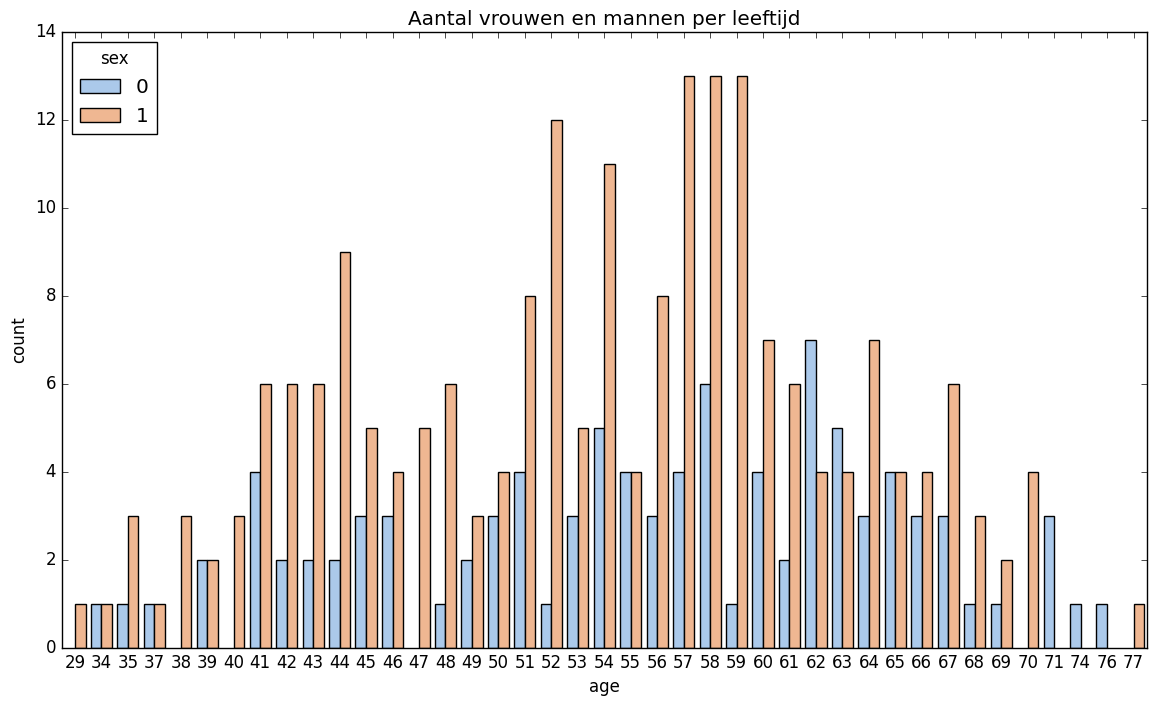

In [108]:
plt.figure(figsize=(14,8))
plt.style.use('classic')
sns.countplot(x="age", data=df, hue="sex", palette="pastel")
plt.title("Aantal vrouwen en mannen per leeftijd")
plt.show()

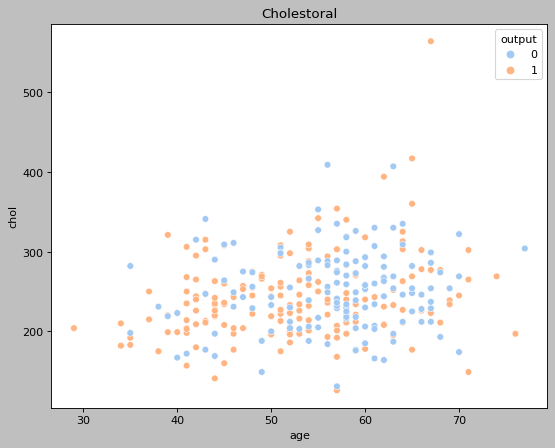

In [109]:
plt.figure(figsize=(8, 6))
plt.style.use("default")
sns.scatterplot(data=df, x="age", y="chol", hue="output", palette="pastel")
plt.title("Cholestoral")
plt.show()

Uit de spreidingsdiagram kunnen wij op maken dat leeftijden tussen de 40 en 57 met een cholesterol tussen de 200 en 300 een verhoogde kans hebben op een hartaanval.

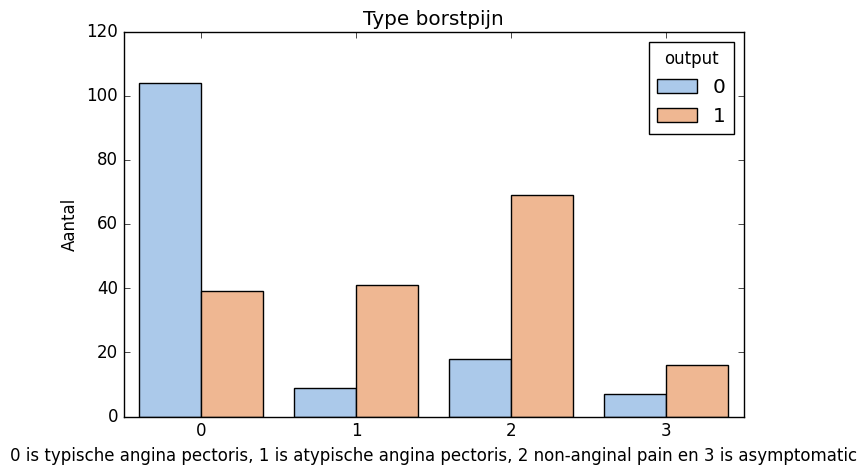

In [110]:
plt.figure(figsize=(8,5))
plt.style.use('classic')
sns.countplot(x="cp", data=df, hue="output", palette="pastel")
plt.title("Type borstpijn")
plt.xlabel("0 is typische angina pectoris, 1 is atypische angina pectoris, 2 non-anginal pain en 3 is asymptomatic")
plt.ylabel("Aantal")
plt.show()

Uit de data blijkt dat typische angina pectoris(0) weinig kans heeft op een hartaanval, bij atypische angina pectoris is er een verhoogde kans dit geldt zowel voor de non-anginal (1 of geen symptomen) als de asymptomatisch (geen symptomen).

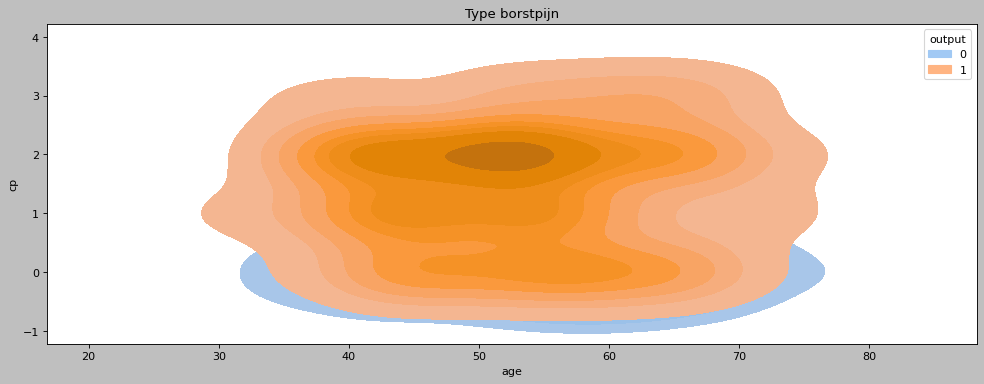

In [111]:
plt.figure(figsize=(15,5))
plt.style.use('default')
sns.kdeplot(x="age", y="cp", data=df, hue="output", fill=True, palette="pastel")
plt.title("Type borstpijn")
plt.show()

Door de heatmap kunnen wij de correlaties tussen de verschillende variabelen. En hoe sterk of hoe zwak de correlaties zijn tussen twee variabelen.
Er zijn geen zeer sterke correlaties uit die heatmap te zien maar wel een paar opvallende variabelen dit zijn de volgende: cp, thalachh, exng en caa.

<Figure size 640x480 with 0 Axes>

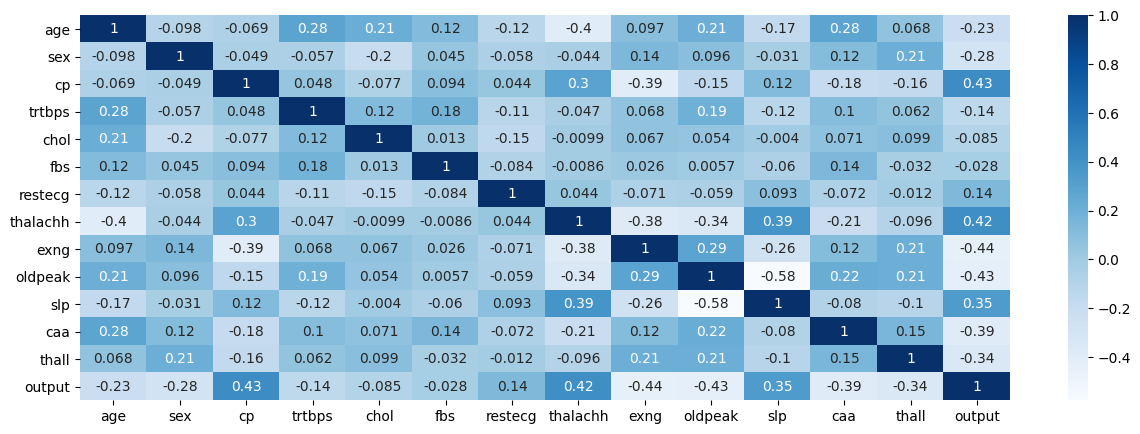

In [112]:
plt.tight_layout()
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), cbar="viridius", annot=True, cmap="Blues")
plt.show()

In [113]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
acc=accuracy_score(Y_test, Y_pred)
print('accuracy is', acc*100,'%')

accuracy is 81.31868131868131 %


In [116]:
print(f"Classification report for {classifier}:\n"f"{metrics.classification_report(Y_test, Y_pred)}\n")

Classification report for LogisticRegression(random_state=42):
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91




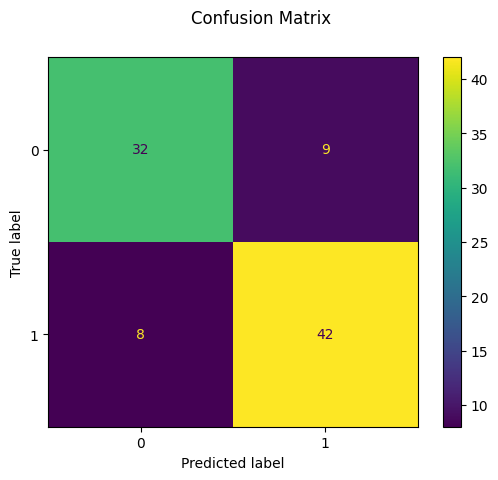

In [117]:
disp = metrics.plot_confusion_matrix(classifier, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [118]:
classifier = KNeighborsClassifier(n_neighbors= 5, p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(Y_pred)
print(Y_test)

[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1]
179    0
228    0
111    1
246    0
60     1
      ..
250    0
19     1
143    1
79     1
144    1
Name: output, Length: 91, dtype: int64


In [119]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
acc = accuracy_score(Y_test, Y_pred)
print('accuracy is', acc*100,'%')

[[35  6]
 [ 6 44]]
accuracy is 86.81318681318682 %


In [120]:
print(f"Classification report for {classifier}:\n"f"{metrics.classification_report(Y_test, Y_pred)}\n")

Classification report for KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91




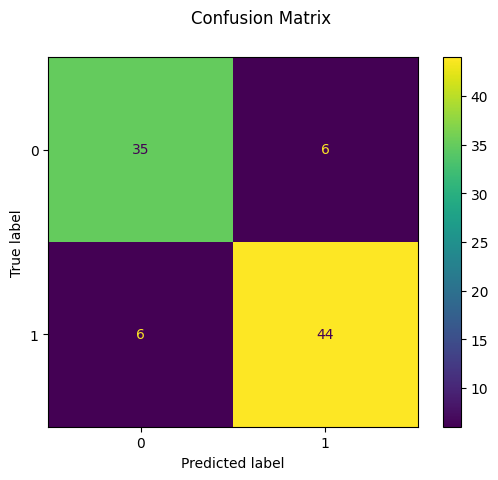

In [121]:
disp = metrics.plot_confusion_matrix(classifier, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [122]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('accuracy is', acc*100,'%')

accuracy is 83.51648351648352 %


In [123]:
print(f"Classification report for {classifier}:\n"f"{metrics.classification_report(Y_test, Y_pred)}\n")

Classification report for RandomForestClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91




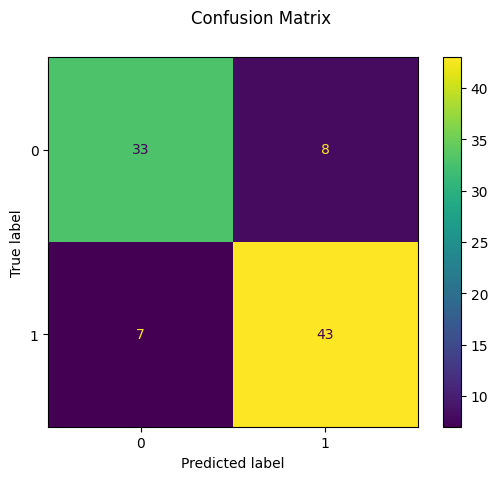

In [124]:
disp = metrics.plot_confusion_matrix(classifier, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Uit de drie modellen die wij hebben gebruikt voor onze dataset is K-nearest neighbours(~86.8%) het meest accuraat met zijn predictie daarna Random Forest(~83.5%) en als laatst Logistic Regression(~81.3%).